### in this we have tried different set of data with different algorithm for imabalanced dataset to get find the best predicting algorithms
1. Logistic Reg
1. SVC
2. Decision tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ajay\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv(r"F:\deep learning\my dataset\30368_38700_bundle_archive\bank-additional-full.csv", sep=';' )

In [3]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:

# The data is highly imbalanced. We have to take care of the final r

df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
#duration needs to be removed as it has direct affect on the dataset
df.drop('duration', inplace = True, axis = 1)

In [8]:
pd.options.display.max_columns =100
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [10]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [11]:
#getting insight of data. Which factor affects more based on job

job_det = pd.crosstab(df.job, df.y)
job_det.iloc[:,:]

y,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


In [12]:
job_detail = job_det.copy()

#Created a dataframe of percentage of people said yes or no based on job
no_list = []
yes_list = []

for i in range(len(job_detail)):
    total = 0
    
    total = job_detail['no'][i]+job_detail['yes'][i]
    no_list.append(100*round(job_detail['no'][i]/total, ndigits=4))
    yes_list.append(100*round(job_detail['yes'][i]/total, ndigits=4))

dicto = {'no':no_list, 'yes':yes_list}

ddf = pd.DataFrame(dicto, columns= ['no', 'yes'], index = [job_detail.index])
ddf

#Mostly retired and students are saving or saying yes.

,no,yes
job,,
admin.,87.03,12.97
blue-collar,93.11,6.89
entrepreneur,91.48,8.52
housemaid,90.00,10.00
management,88.78,11.22
retired,74.77,25.23
self-employed,89.51,10.49
services,91.86,8.14
student,68.57,31.43


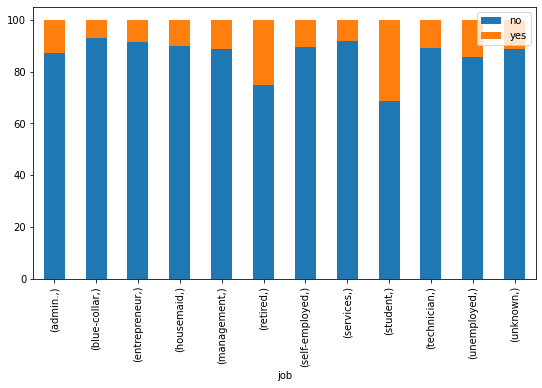

In [13]:
ddf.plot(kind='bar', stacked=True, figsize=(9,5))

In [14]:
k = df.groupby(['job', 'y']).count()['age']
k

job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
Name: age, dtype: int64

In [15]:
married = pd.crosstab(df.marital, df.y)
married

#married.div is used to divide row of dataframe

married.div(married.sum(1).astype(float), axis=0) #marrid.sum returns the sum of requested axis


y,no,yes
marital,,
divorced,0.896791,0.103209
married,0.898427,0.101573
single,0.859959,0.140041
unknown,0.850000,0.150000


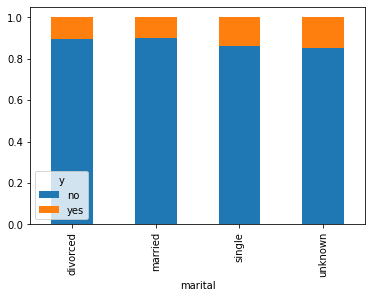

In [16]:
married.div(married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

Text(0, 0.5, 'percentage')

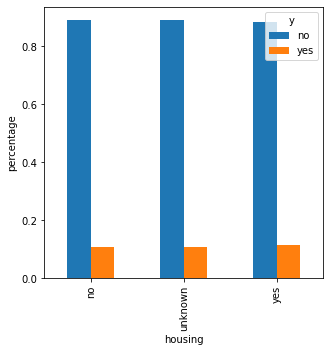

In [17]:
table= pd.crosstab(df.housing, df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, figsize=(5,5))
plt.xlabel('housing')
plt.ylabel('percentage')

In [18]:
import sweetviz

In [19]:
my_report = sweetviz.analyze([df, 'df'], target_feat='y')

:FEATURES DONE:                    |█████████████████████| [100%]   00:11  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:12  -> (00:00 left)


Creating Associations graph... DONE!


In [20]:
my_report.show_html('report.html')

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [21]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [22]:
#First we'll replace output columns value with numerical data

#best option to replace
y_nums = {'y': {'yes':1, 'no':0}}

df.replace(y_nums, inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [24]:
df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [25]:
categorical_col = df.iloc[:, 1:10]
categorical_col

,job,marital,education,default,housing,loan,contact,month,day_of_week
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon
1,services,married,high.school,unknown,no,no,telephone,may,mon
2,services,married,high.school,no,yes,no,telephone,may,mon
3,admin.,married,basic.6y,no,no,no,telephone,may,mon
4,services,married,high.school,no,no,yes,telephone,may,mon
...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri
41186,technician,married,professional.course,no,no,no,cellular,nov,fri


In [26]:
#attached remaining categorical column together

categorical_col['poutcome'] = df.poutcome

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#apply is used for dataframe operations as every level

label_encoded = categorical_col.apply(LabelEncoder().fit_transform)
label_encoded


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3,1,0,0,0,0,1,6,1,1
1,7,1,3,1,0,0,1,6,1,1
2,7,1,3,0,2,0,1,6,1,1
3,0,1,1,0,0,0,1,6,1,1
4,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...
41183,5,1,5,0,2,0,0,7,0,1
41184,1,1,5,0,0,0,0,7,0,1
41185,5,1,6,0,2,0,0,7,0,1
41186,9,1,5,0,0,0,0,7,0,1


In [28]:
# one hot encoding the columns 

categorical_updated = pd.get_dummies(categorical_col,drop_first=True)
categorical_updated

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41184,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41185,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41186,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [29]:
# seperating categorical columns with std columns

col = [s  for s in df.columns if s not in categorical_col.columns]
col

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [30]:
#conctenating update column and old column
df_3 = pd.concat([df[col], categorical_updated], axis=1)

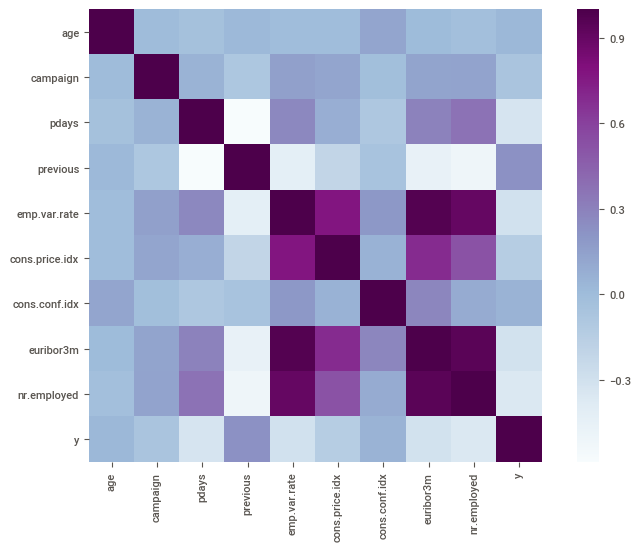

In [31]:
#checking correlation

matrix = df.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, square=True, cmap = 'BuPu')

In [56]:
# We'll try 3 set for prediction and than we'll jump on other alogrithms

# 1 = 20k values of 0 and 5k of 1 outcome
# 2 = 10k values of 0 and 5k of 1 will be given two time that 10k of 1
# 3 = All set of 0 and 1 as it is.

df_class_1 = df_3[df_3.y==1]   # Minority class 
df_class_0 = df_3[df_3.y==0]   # Majority class



In [57]:
# 1 = 20k values of 0 and 5k of 1 outcome

set1 = df_class_0.sample(n=20000, random_state=2) #random sampling

df_set1 = pd.concat([df_class_1,set1]) #merging the rows


In [58]:
y = df_set1.y
x = df_set1.drop(labels = 'y', axis=1)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import StratifiedKFold


### Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x,y)

predict = model.predict(x)
score = accuracy_score(y, predict)
score

0.8466314935064935

In [62]:
from sklearn.metrics import roc_auc_score

predict_class_prob = model.predict_proba(x)

#keeping only positive values
y_proba = [p[1] for p in predict_class_prob]

#printing roc auc 
roc_auc_score(y, y_proba) 

#it is calculating 79 percent accurately (fairely good)

0.7908376293103447

In [63]:
# in this Second trial we'll upsample the data. means we'll increase the quanity of minority 
# equal to the majority

df_class_1_upsample = pd.concat([df_class_1, df_class_1])

for i in range(6):
    df_class_1_upsample = pd.concat([df_class_1, df_class_1_upsample])

final_data = pd.concat([df_class_0, df_class_1_upsample])

In [86]:
final_data.reset_index(inplace= True) #reset index
y = final_data.y

x = final_data.drop(['y', 'index'], axis = 1)

In [87]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73668 entries, 0 to 73667
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   level_0                        73668 non-null  int64  
 1   age                            73668 non-null  int64  
 2   campaign                       73668 non-null  int64  
 3   pdays                          73668 non-null  int64  
 4   previous                       73668 non-null  int64  
 5   emp.var.rate                   73668 non-null  float64
 6   cons.price.idx                 73668 non-null  float64
 7   cons.conf.idx                  73668 non-null  float64
 8   euribor3m                      73668 non-null  float64
 9   nr.employed                    73668 non-null  float64
 10  job_blue-collar                73668 non-null  uint8  
 11  job_entrepreneur               73668 non-null  uint8  
 12  job_housemaid                  73668 non-null 

In [66]:
#building model

model = LogisticRegression(max_iter=1000)
model.fit(x,y)
y_pred = model.predict(x)

score = accuracy_score(y, y_pred)
score

0.7370228593147635

In [67]:
from sklearn.metrics import roc_auc_score

predict_class_prob = model.predict_proba(x)

#keeping only positive values
y_proba = [p[1] for p in predict_class_prob]

#printing roc auc 
roc_auc_score(y, y_proba) #it is calculating 78 percent accurately it has decreased

0.7892087531088074

In [41]:
#BY upsampling the data we have 73 percent accuracy.

#next we'll use some recursive feature elimination technique and try to find the better features.

In [42]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

for train_index,test_index in kf.split(x,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = x.loc[train_index], x.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = LogisticRegression(max_iter=1000, random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
pred_test = model.predict(x)
accuracy_score(y,pred_test)


1 of kfold 5
accuracy_score 0.7392425682095832

2 of kfold 5
accuracy_score 0.7370028505497489

3 of kfold 5
accuracy_score 0.7389032170490023

4 of kfold 5
accuracy_score 0.7347451299803163

5 of kfold 5
accuracy_score 0.7326410099776013


0.7374436661779877

In [68]:
# undersampling technique we'll use 

df_count_0, df_count_1 = df_3.y.value_counts()

In [69]:
df_sample_0 = df_class_0.sample(df_count_1)

df_under = pd.concat([df_sample_0, df_class_1])
df_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9280 entries, 22068 to 41186
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            9280 non-null   int64  
 1   campaign                       9280 non-null   int64  
 2   pdays                          9280 non-null   int64  
 3   previous                       9280 non-null   int64  
 4   emp.var.rate                   9280 non-null   float64
 5   cons.price.idx                 9280 non-null   float64
 6   cons.conf.idx                  9280 non-null   float64
 7   euribor3m                      9280 non-null   float64
 8   nr.employed                    9280 non-null   float64
 9   y                              9280 non-null   int64  
 10  job_blue-collar                9280 non-null   uint8  
 11  job_entrepreneur               9280 non-null   uint8  
 12  job_housemaid                  9280 non-nul

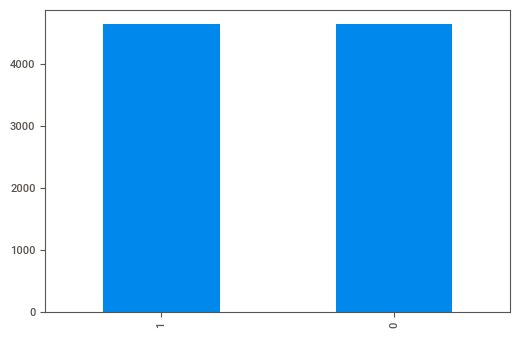

In [70]:
df_under.y.value_counts().plot(kind='bar')

In [71]:
y = df_under.y
x = df_under.drop('y', axis= 1)

In [72]:
model = LogisticRegression(max_iter=1000)

model.fit(x,y)
y_pred = model.predict(x)
accuracy_score(y, y_pred)

0.7366379310344827

In [73]:
from sklearn.metrics import roc_auc_score

predict_class_prob = model.predict_proba(x)

#keeping only positive values
y_proba = [p[1] for p in predict_class_prob]

#printing roc auc 
roc_auc_score(y, y_proba) #it is calculating 79percent accurately 

0.7888225512782401

In [48]:
# lets try using Decision tree

In [74]:
from sklearn.tree import DecisionTreeClassifier


In [88]:
model = DecisionTreeClassifier()

model.fit(x,y)

y_pred = model.predict(x)
accuracy_score(y, y_pred)

1.0

In [82]:
#now we'll give whole dataset to this 

0.9962284482758621

In [89]:
from sklearn.metrics import roc_auc_score

predict_class_prob = model.predict_proba(x)

#keeping only positive values
y_proba = [p[1] for p in predict_class_prob]

#printing roc auc 
roc_auc_score(y, y_proba) #it is calculating 99 percent accurately for roc

1.0

In [77]:
# here we have used our old df_set1 which has 20k value of class 0 and 5k value of class 1

yy = df_set1.y
xx = df_set1.drop('y', axis=1)

y_pred1 = model.predict(xx)
accuracy_score(yy, y_pred1)

0.7468344155844155

In [80]:
from sklearn.metrics import roc_auc_score

predict_class_prob = model.predict_proba(x)

#keeping only positive values
y_proba = [p[1] for p in predict_class_prob]

#printing roc auc 
roc_auc_score(y, y_proba) #it is calculating 99% still accurately

0.9999713417806183

In [52]:
# lets check for performance metric of each model we have build till now

In [85]:
len(y)

9280

In [ ]:
# Penalize Algorithms (Cost-Sensitive Training)
#SVM technique for penalizing model for minority class 

In [ ]:
# from sklearn.svm import SVC

# #takign original dataset
# x = df_3.drop('y', axis = 1)
# y = df_3.y



# model = SVC(kernel = 'linear', class_weight = 'balanced', probability = True)
# model.fit(x,y)


# #predictig training set 
# y_pred = model.predict(x)


# #printing accuraacy
# accuracy_score(y, y_pred) 

# #the model took 20 mins to run and gave 85 percent accuracy hence commenting the 
#whole model so that I dont waste time.

In [100]:
from sklearn.metrics import roc_auc_score

predict_class_prob = model.predict_proba(x)

#keeping only positive values
y_proba = [p[1] for p in predict_class_prob]

#printing roc auc 
roc_auc_score(y, y_proba) #it is calculating 76 % its predicting positive values accurately

0.7691260052911051

In [97]:
# After running different algorithms we found decision tree to be most useful among them.

0    36548
1     4640
Name: y, dtype: int64